In [107]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd


In [108]:
mh_ban = pd.read_csv('mh_chains_ban.csv')
hm_ban = pd.read_csv('hm_chains_ban.csv')


In [109]:
hm_ban

,x0,x1,isRejected,chain_no
0,1.570537,1.175997,False,1
1,1.552585,1.316758,False,1
2,0.964569,2.557853,False,1
3,-2.416339,4.662749,False,1
4,2.764602,4.434990,False,1
...,...,...,...,...
4995,3.821363,3.811898,False,5
4996,-4.128361,4.636829,False,5
4997,3.415107,5.597871,False,5
4998,-1.984329,4.500364,False,5


In [110]:
def analyzeChains(df, title):
    plt.rcParams["figure.figsize"] = (16,8) 
    fig,axes = plt.subplots(2,2)
    fig.suptitle(title)
    sns.histplot(ax = axes[0,0], data=df,x='x0',hue='chain_no',multiple="stack",palette="Set2",kde=True)
    sns.histplot(ax = axes[0,1], data=df,x='x1',hue='chain_no',multiple="stack",palette="Set2",kde=True)
    for i in range(5):
        d = df[df['chain_no']==(i+1)]
        s1 = sns.lineplot(ax=axes[1,0], data=d,x=np.arange(len(d)), y='x0',legend='brief',label=f'{i+1}',alpha=0.6)
        s2 = sns.lineplot(ax=axes[1,1], data=d,x=np.arange(len(d)), y='x1',legend='brief',label=f'{i+1}',alpha=0.6)
    plt.tight_layout()
    plt.show()

    

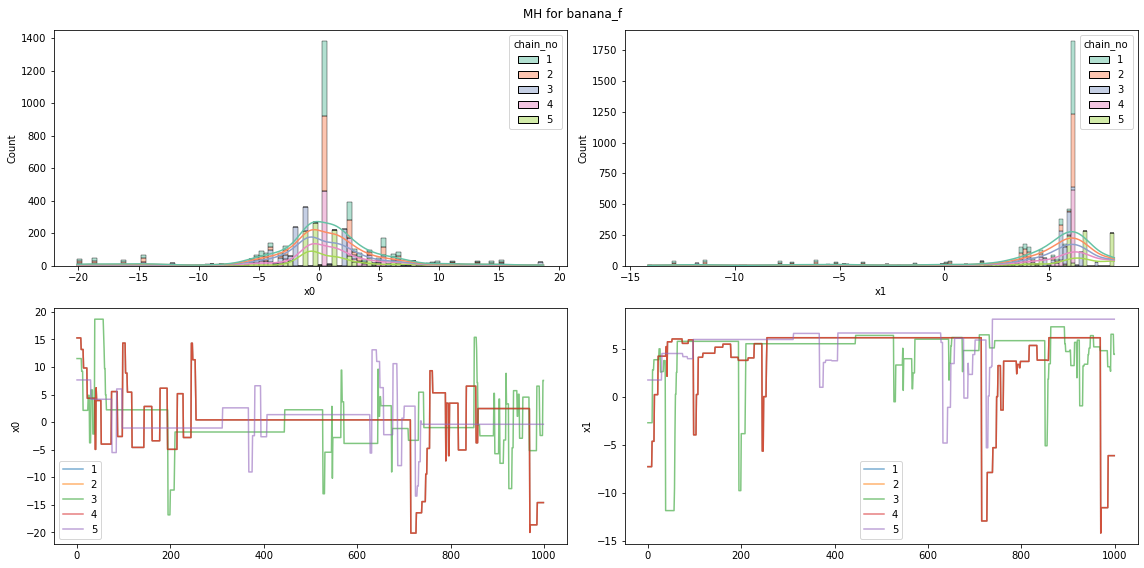

In [111]:
analyzeChains(mh_ban,'MH for banana_f')

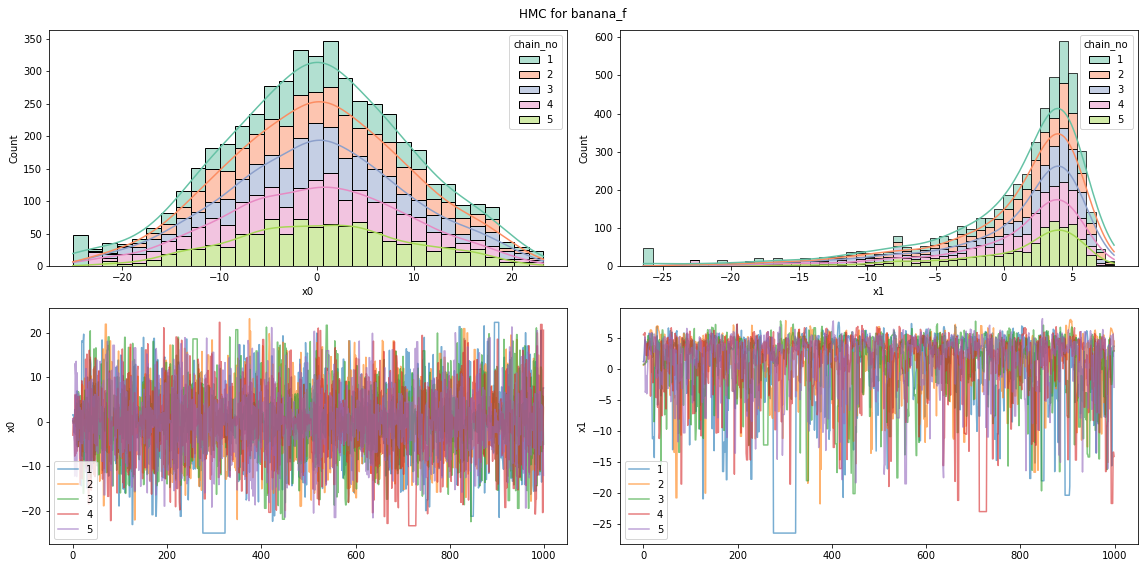

In [112]:
analyzeChains(hm_ban,'HMC for banana_f')

In [113]:
from scipy import stats
from helper_f import banana_f

In [114]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = banana_f(np.array([X, Y]))

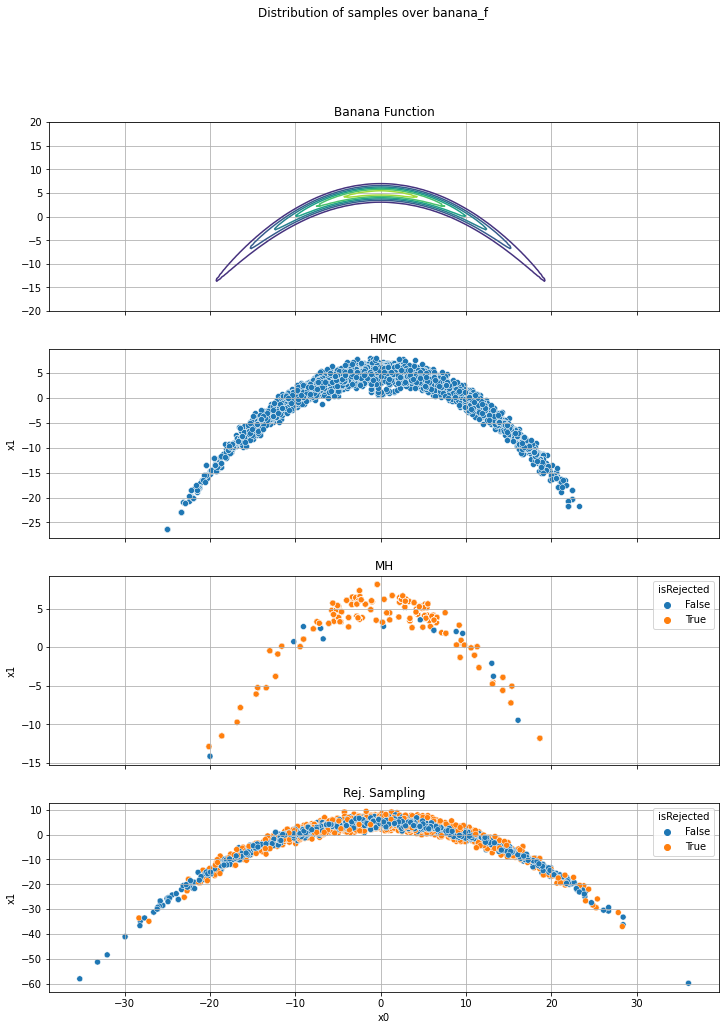

In [115]:
ban_samples_hm = pd.read_csv('hm_chains_ban.csv')
ban_samples_mh = pd.read_csv('mh_chains_ban.csv')
ban_samples_rej = pd.read_csv('rej_chains_ban.csv')
plt.rcParams["figure.figsize"] = (12,16)

fig,axes = plt.subplots(4,1,sharex='col')
fig.suptitle('Distribution of samples over banana_f') 
axes[0].contour(X,Y,Z)
axes[0].title.set_text('Banana Function')
[ax.grid() for ax in axes]
sns.scatterplot(data=ban_samples_hm, x='x0',y='x1',ax=axes[1])
axes[1].title.set_text('HMC')
sns.scatterplot(data=ban_samples_mh, x='x0',y='x1',hue='isRejected',ax=axes[2])
axes[2].title.set_text('MH')

sns.scatterplot(data=ban_samples_rej, x='x0',y='x1',hue='isRejected',ax=axes[3])
axes[3].title.set_text('Rej. Sampling')
# plt.tight_layout()
plt.legend(title='isRejected')
plt.show()